In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Base data
X = [0.8, 0.9, 1.2, 1.1, 0.8, 0.6, 0.65, 0.75]
Y = [1.2, 1.4, 1.4, 1.5, 1.1, 1, 1.1, 0.9]
Class = np.array([1, 1, 1, 1, 2, 2, 2, 2])

1) (45) Mahalanobis distance vs. Euclidean distance.

a. (10) Manually calculate the mean and covariance of the two classes of training
samples. You can use calculator for intermediate calculations. However, you need
to show details.

In [ ]:
# data seperated into classes
X1 = [0.8, 0.9, 1.2, 1.1]
Y1 = [1.2, 1.4, 1.4, 1.5]

X2 = [0.8, 0.6, 0.65, 0.75]
Y2 = [1.1, 1, 1.1, 0.9]

Data = [[0.8, 1.2],
        [0.9, 1.4],
        [1.2, 1.4],
        [1.1, 1.5],
        [0.8, 1.1],
        [0.6, 1.0],
        [0.65, 1.1],
        [0.75, 0.9]]

Class1 = [[0.8, 1.2],
          [0.9, 1.4],
          [1.2, 1.4],
          [1.1, 1.5]]
Class2 = [[0.8, 1.1],
          [0.6, 1.0],
          [0.65, 1.1],
          [0.75, 0.9]]


# Doing all calculations manmually by hard coding the data into it
X1_mean = (0.8 + 0.9 + 1.2 + 1.1) / 4       # = 1.0
X2_mean = (0.8 + 0.6 + 0.65 + 0.75)  / 4    # = 0.7

Y1_mean = (1.2 + 1.4 + 1.4 + 1.5)/ 4        # = 1.375
Y2_mean = (1.1 + 1.0 + 1.1 + 0.9) / 4       # = 1.025

class1_mean = [X1_mean, Y1_mean]
class2_mean = [X2_mean, Y2_mean]
print("Class 1 means[X1,Y1]:", class1_mean)
print("Class 2 means[X2,Y2]:", class2_mean)

# I belive I am basically going throught the covariance matrixes to caclulate specific covariances. I am calculating the covariance matrizes on the fly
# Sum of: (Xi - Ymean) * (yi -Ymean) / (N-1), n is 4 here since each class has 4 entries. This is basically what i am doing here even if it looks a bit diffrent
# Class 1
class1_covar = ( (0.8 - X1_mean) * (1.2 - Y1_mean) + (0.9 - X1_mean) * (1.4 - Y1_mean) + (1.2 - X1_mean) * (1.4 - Y1_mean) + (1.1 - X1_mean) * (1.5 - Y1_mean) ) / (4 - 1) # ~= 0.0167
print("CLass 1 Covar:", class1_covar)
# Class 2
class2_covar = ( (0.8 - X2_mean) * (1.1 - Y2_mean) + (0.6 - X2_mean) * (1.0 - Y2_mean) + (0.65 - X2_mean) * (1.1 - Y2_mean) + (0.75 - X2_mean) * (0.9 - Y2_mean) ) / (4 - 1) # ~=
print("Class 2 Covar:", class2_covar)

# I did these by accident but I will still leave this here
#X1_covar = ((0.8 - X1_mean)**2 + (0.9 - X1_mean)** 2 + (1.2 - X1_mean)**2 + (1.1 - X1_mean)**2) / 3   # = 0.0333
#Y1_covar = ((1.2 - Y1_mean)**2 + (1.4 - Y1_mean)** 2 + (1.4 - Y1_mean)**2 + (1.5 - Y1_mean)**2) / 3   # = 0.0158
# X2_covar = ((0.8 - X2_mean)**2 + (0.6 - X2_mean)** 2 + (0.65 - X2_mean)**2 + (0.75 - X2_mean)**2) / 3 # = 0.00833
# Y2_covar = ((1.1 - Y2_mean)**2 + (1.0 - Y2_mean)** 2 + (1.1 - Y2_mean)**2 + (0.9 - Y2_mean)**2) / 3   # = 0.00916


Class 1 means[X1,Y1]: [1.0, 1.375]
Class 2 means[X2,Y2]: [0.7, 1.0250000000000001]
CLass 1 Covar: 0.01666666666666667
Class 2 Covar: 4.04768811061255e-18


b. (10) Assuming Gaussian distribution, based on the means and covariance matrix,
plot the contour maps of the two multi-variate Gaussian distributions for the two
classes in Python, overlay the contour on the scatter plot of the data samples. Also
plot a test sample x = [0.85 1.15]
T on the same figure with different color. Which
class do you think x should belong to (based only on visual inspection)?

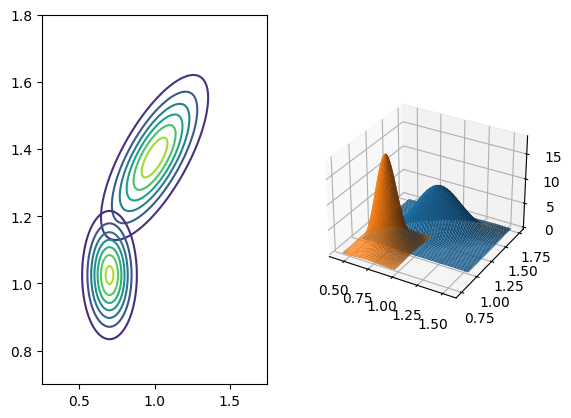

In [ ]:
# Given on teams
def gaussianmd(x, mu, Sigma):
    """
    Multivariate Gaussian
    """
    d = max(mu.shape)          # dimension
    dmah2 = np.dot(np.dot(x-mu, np.linalg.inv(Sigma)), x-mu)
    gx = 1.0 / ((2*np.pi)**(d/2) * np.linalg.det(Sigma)**0.5) * np.exp(-0.5 * dmah2)
    return gx

def plot_Gaussian(mu, Sigma):
    # plot the 3D Gaussian and contour map
    n = 100
    lx = mu[0] - 3 * Sigma[0, 0] ** 0.5
    ux = mu[0] + 3 * Sigma[0, 0] ** 0.5
    ly = mu[1] - 3 * Sigma[1, 1] ** 0.5
    uy = mu[1] + 3 * Sigma[1, 1] ** 0.5
    x = np.linspace(lx, ux, n)
    y = np.linspace(ly, uy, n)
    X, Y = np.meshgrid(x, y)
    XY = np.column_stack([X.flat, Y.flat])
    nrow, _ = XY.shape
    z = np.zeros(nrow)
    for i in range(nrow):
        z[i] = gaussianmd(XY[i,:], mu, Sigma)
    Z = np.reshape(z, X.shape)

    return X, Y, Z

################ Problem 1b)From teams again basically, using data I set earlier

Sigma1 = np.cov(np.transpose(Class1))
mean1 = np.mean(Class1, axis = 0)
Sigma2 = np.cov(np.transpose(Class2))
mean2 = np.mean(Class2, axis = 0)

## plot the 3D Gaussian and contour map
XX1, YY1, Z1 = plot_Gaussian(mean1, Sigma1)
XX2, YY2, Z2 = plot_Gaussian(mean2, Sigma2)


fig = plt.figure()
f1 = fig.add_subplot(121)
f2 = fig.add_subplot(122, projection = '3d')
f1.contour(XX1, YY1, Z1)
f1.contour(XX2, YY2, Z2)

f1.axis([0.25, 1.75, 0.7, 1.8])

f2.plot_surface(XX1, YY1, Z1)
f2.plot_surface(XX2, YY2, Z2)


c. (5) Write the equations to calculate these two distances between the testing
sample and the cluster. (Note: ONLY the equation. Also Note: this is distance not
squared distance)

Euclidean Distance is: d = SquareRoot( (x - mu)T * (x - mu) )

Mahalanobis Distance is: d = SquareRoot( (x - mu)T * Covariance_Matrix * (x - mu) )

In both cases, mu is the mean vector for the class, x is the test sample, and T is transpose

d. (5) Explain intuitively (in no more than three sentences) the differences between
the two distances.

The biggest diffrence between the two types of distances is how Mahalanobis includes the covariance in its calculation. This is big because it alows for the corrolation to scale the distance some, providing better discrimination of the data.

e. (15) Use the following example to understand the differences these two distances
make in classification. Here, the minimum distance classifier (i.e., Case 1) is used.

In [ ]:
# i. (5) Given a test sample x = [0.85 1.15]Transpose
#  calculate the Euclidean distance
# to the two class means. Based on the distances, which class should x
# belong to?

tp = [0.85, 1.15]

ed1 = math.sqrt((X1_mean - 0.85)**2 + (Y1_mean - 1.15)**2) # ~= 0.2704
ed2 = math.sqrt((X2_mean - 0.85)**2 + (Y2_mean - 1.15)**2) # ~= 0.1953

print("Class 1 euclidean distance:", ed1)
print("Class 2 euclidean distance:", ed2)
print("Since class 2 is closer, I would classify the testing point to be 2 based on euclidean distasnce/")

from scipy.spatial import distance
# data just reformated into a feture matrix to make this a bit easier
feature_matrix = np.array([[0.8,  1.2 ],  # X Y
                  [0.9,  1.4 ],  # X
                  [1.2,  1.4 ],  #
                  [1.1,  1.5 ],  #
                  [0.8,  1.1 ],  # XY
                  [0.6,  1.  ],  #
                  [0.65, 1.1 ],  #
                  [0.75, 0.9 ]])  #
class1_covar_matrix = np.cov(feature_matrix[Class == 1], rowvar=False)
class2_covar_matrix = np.cov(feature_matrix[Class == 2], rowvar=False)

cov_class_1 = np.cov(X[Y == 1], rowvar=False)

md1 = distance.mahalanobis(tp, class1_mean, class1_covar_matrix)
md2 = distance.mahalanobis(tp, class2_mean, class2_covar_matrix)

print("Class 1 mahalanobis distance:", md1)
print("Class 2 mahalanobis distance:", md2)
print("Since class 2 is closer, I would classify the testing point to be 2 based on mahalanobis distance/") # looking at the data, I think this makes sence as class 2 items all look much closer in general

##### FOR KNN
# If we look at the data, and look for the single closest neighbor to the test point of (0.85, 1.15), we will see an imidiate problem, their are two points that are the clossest to it.
# These are [0.8, 1.2 ] and [0.8  1.1 ], both being about 0.7 away. The other problem with this is that the two points belong to two seperate classes.
# Therefore I belive that this would come down to how kNN has been implemented. I would assume it would be either the first one it caclulates of the two, or just a random selection between them.
# So it could be either 1 or 2 in this case becasuse k = 1


Class 1 euclidean distance: 0.2704163456597993
Class 2 euclidean distance: 0.19525624189766624
Since class 2 is closer, I would classify the testing point to be 2 based on euclidean distasnce/
Class 1 mahalanobis distance: 0.05173550521643721
Class 2 mahalanobis distance: 0.018185960702329328
Since class 2 is closer, I would classify the testing point to be 2 based on mahalanobis distance/


<ipython-input-126-c1e0d3f25c3e>:28: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_class_1 = np.cov(X[Y == 1], rowvar=False)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


2) (20) Plot the 2-D Gaussian as well as the contour map (i.e., projection of this Gaussian on
the x-y plane) with the following covariance characteristics (14 pts). From the plots,
elaborate on the physical meaning of each element in the covariance matrix (6 pts – you
should learn at least 3 things if given an arbitrary covariance matrix). This is not based on
the given dataset. (Note: Suggest to generate a 4x2 plot with the left column the 2-D
Gaussian and the right column the contour plot.)

a. The off-diagonal elements are zero and the diagonal elements are equal to each
other

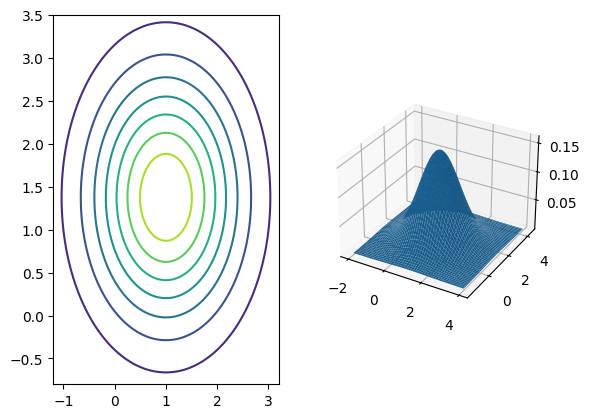

In [ ]:
cov_matrix_a = np.array([[1, 0], [0, 1]])  # non diagonal are zero and diagonal are equal

# plotting same way as given for 1b
XX_a, YY_a, Z_a = plot_Gaussian(mean1, cov_matrix_a)

fig = plt.figure()
f1 = fig.add_subplot(121)
f2 = fig.add_subplot(122, projection='3d')
f1.contour(XX_a, YY_a, Z_a)
f1.axis([-1.2, 3.2, -0.8, 3.5])           # modified to see more
f2.plot_surface(XX_a, YY_a, Z_a)




b. The off-diagonal elements are zero and the diagonal elements are not equal to
each other

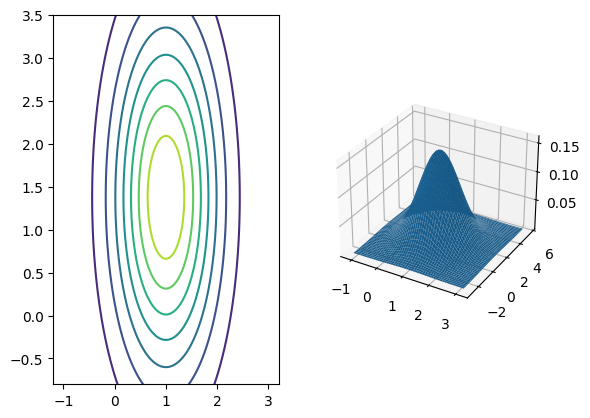

In [ ]:
cov_matrix_b = np.array([[.5, 0], [0, 2]])  # off diagonal are zero and diagonal dont equal

XX_b, YY_b, Z_b = plot_Gaussian(mean1, cov_matrix_b)

fig = plt.figure()
f1 = fig.add_subplot(121)
f2 = fig.add_subplot(122, projection='3d')
f1.contour(XX_b, YY_b, Z_b)
f1.axis([-1.2, 3.2, -0.8, 3.5])
f2.plot_surface(XX_b, YY_b, Z_b)


c. The off-diagonal elements are positive and the diagonal elements are not equal to
each other

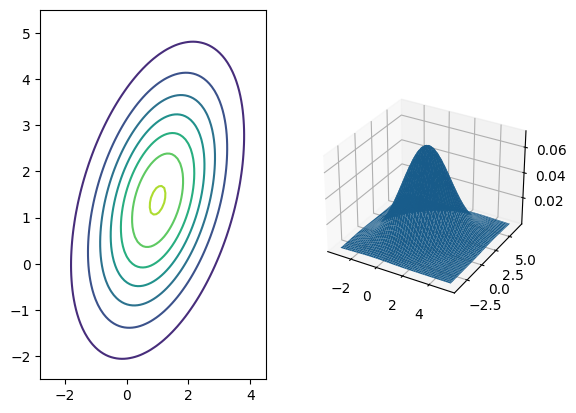

In [ ]:
cov_matrix_c = np.array([[2, 1], [1, 3]])  # off diagonals are positive and diagonals dont equal, played it safe with diagonals not equaling nondiagonals

XX_c, YY_c, Z_c = plot_Gaussian(mean1, cov_matrix_c)

fig = plt.figure()
f1 = fig.add_subplot(121)
f2 = fig.add_subplot(122, projection='3d')
f1.contour(XX_c, YY_c, Z_c)
f1.axis([-2.8, 4.5, -2.5, 5.5])
f2.plot_surface(XX_c, YY_c, Z_c)


d. The off-diagonal elements are negative and the diagonal elements are not equal to
each other

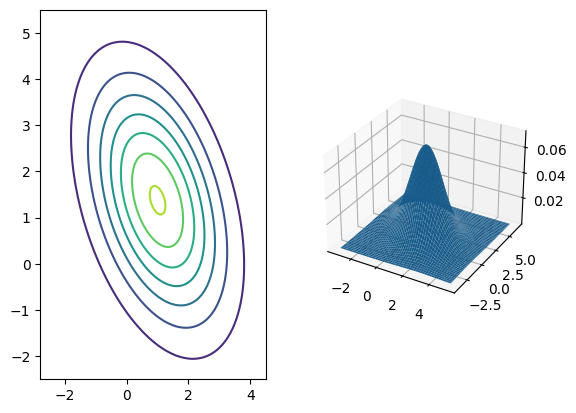

In [ ]:
cov_matrix_d = np.array([[2, -1], [-1, 3]])  # negative diagonals and non equaling diagonals

XX_d, YY_d, Z_d = plot_Gaussian(mean1, cov_matrix_d)

fig = plt.figure()
f1 = fig.add_subplot(121)
f2 = fig.add_subplot(122, projection='3d')
f1.contour(XX_d, YY_d, Z_d)
f1.axis([-2.8, 4.5, -2.5, 5.5])
f2.plot_surface(XX_d, YY_d, Z_d)


From the plots, we can see major diffrences in each of the first plots while also seeing sudble but clear diffrences in the second plots.
For the first graphs, we can see streches occur when we scale the main diagonal.
We see shifts left and right depending on if the non-diagonals are negative or positive, in that order.
Their is also no colleration between the two when the non diagonals are zero, when the diagonal don't equal their is no corralation between the two, and when the non-diagonals are positive their is a positive corelation, and when they are negative their is an negative corralation.

3) (10) Using maximum likelihood method to derive the equation for mean and variance
assuming the pdf (or likelihood) is modeled by 1-D Gaussian

Example of 1d gaussian: 1.0/((2*pi)**0.5 * sigma) ^ (-(x-mu)**2 / (2 * sigma**2))

We want to get the exponent of that exuation, because variance is the standard deviation squared, and we also want the mean, which is also in that exponent.


rest of work uploaded on canvas with titel VBRODA_HW2_P3

4) (25) Comparison between FLD and PCA. Note that FLD and PCA are dimensionality
reduction methods that only output a projection direction. Additional classification
methods need to be applied to find the decision boundary. Suppose the minimum
(Euclidean) distance (MD) classifier is used. On the same figure, plot the four samples of
the AND gate (5 pts), and compare the decision boundary from FLD+MD (10 pts) and
PCA+MD (10 pts). You can use whichever language that you feel comfortable (pencil &
paper or Python).

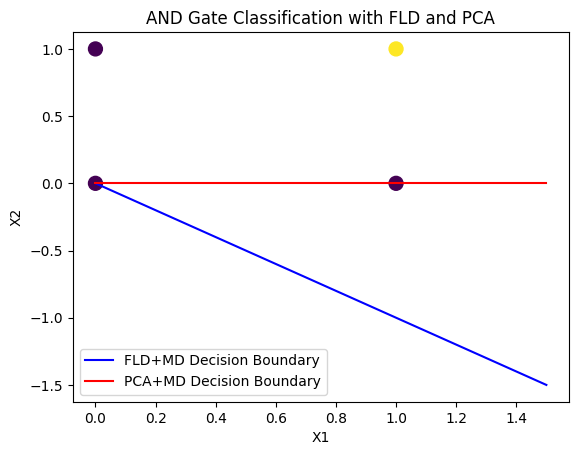

FLD+MD test: 0
PCA+MD test: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for an AND gate, bassically just a simple truth tabel
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # [x1 x2]
Y = np.array([0, 0, 0, 1])

# Define FLD function
def fisher_lda(X, Y):
    class0 = X[Y == 0]
    class1 = X[Y == 1]
    mean0 = np.mean(class0, axis=0)
    mean1 = np.mean(class1, axis=0)

    # Calculate between-class scatter matrix
    Sb = np.outer((mean1 - mean0).reshape(-1, 1), (mean1 - mean0).reshape(1, -1))
    # Calculate within-class scatter matrix
    Sw = np.dot((class0 - mean0).T, class0 - mean0) + np.dot((class1 - mean1).T, class1 - mean1)

    # Calculate eigenvalues and eigenvectors of Sw^-1 * Sb
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    W = eigenvectors[:, 0]
    W /= np.linalg.norm(W)
    return W

def principal_component_analysis(X):
    mean = np.mean(X, axis=0)
    centered_data = X - mean
    covar_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covar_matrix)

    # Sort eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top eigenvector. point is to get and return W
    w_components = eigenvectors[:, :1]
    #Project the data onto the new m-dimensional space
    #projected_data = np.dot(centered_data, principal_components)
    #ignored_components = eigenvalues[1:].sum()
    return w_components

def md_classifier(W, X_train, Y_train, x_test):
    # Project the data onto the projection direction(s)
    X_train_proj = X_train.dot(W)
    x_test_proj = x_test.dot(W)
    # Calculate Euclidean distances from x_test to all training samples
    distances = np.linalg.norm(X_train_proj - x_test_proj)
    # Find the index of the nearest training sample
    nearest_index = np.argmin(distances)
    # Return the corresponding class label
    return Y_train[nearest_index]

W_fld = fisher_lda(X, Y)
W_pca = principal_component_analysis(X)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', marker='o', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

# Decision boundaries
x_boundary = np.linspace(0, 1.5, 100)
y_boundary_fld = -(W_fld[0] / W_fld[1]) * x_boundary
y_boundary_pca = -(W_pca[0] / W_pca[1]) * x_boundary

plt.plot(x_boundary, y_boundary_fld, label='FLD+MD Decision Boundary', color='blue')
plt.plot(x_boundary, y_boundary_pca, label='PCA+MD Decision Boundary', color='red')
plt.legend()
plt.title('AND Gate Classification with FLD and PCA')
plt.show()

# Classify a new data point using FLD+MD
new_data_point = np.array([0.3, 0.8])  # I think it just asked for random points inbetween
predicted_class_fld = md_classifier(W_fld, X, Y, new_data_point)
print('FLD+MD test:', predicted_class_fld)

# Classify the same new data point using PCA+MD
predicted_class_pca = md_classifier(W_pca, X, Y, new_data_point)
print('PCA+MD test:', predicted_class_pca)

# I might have done something wrong, I feel like the line should have a y-intercept of somekind to them. I also used the sklearn libraries to test and that it was they look like, my plot but with the boundries translated up a bit